# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1200]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import ttest_ind
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from wordcloud import WordCloud
from IPython.display import display

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

# Regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import Lasso

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


import joblib
# Hide warnings
import warnings
warnings.filterwarnings('ignore')


In [1201]:
df = pd.read_csv("data/train.csv")
df.sample(5)

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
3806,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,2,17M,50+,Paid,$9.99,Everyone,Auto & Vehicles,"June 25, 2018",3.0.0,4.0 and up,NaN
7142,Endless Ducker,GAME,8193,41M,"500,000+",Free,0,Everyone,Arcade,"September 16, 2016",1.0.7,4.0.3 and up,4.5
6725,RoutePlan.cz,PRODUCTIVITY,6,5.3M,100+,Free,0,Everyone,Productivity,"June 6, 2018",2.5.4,4.0.3 and up,NaN
5992,CG BILASPUR CARNIVAL,EVENTS,59,1.8M,"5,000+",Free,0,Everyone,Events,"April 11, 2018",1.5,4.0 and up,3.8
887,Digit Save Money Automatically,FINANCE,8188,22M,"100,000+",Free,0,Everyone,Finance,"July 31, 2018",2.29.01,4.1 and up,4.5


In [1202]:
duplicate = df.duplicated()
duplicate.sum()



np.int64(310)

In [1203]:
df = df.drop_duplicates().reset_index(drop=True)

In [1204]:
duplicate = df.duplicated()
duplicate.sum()

np.int64(0)

In [1205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8658 non-null   object 
 1   Category         8658 non-null   object 
 2   Reviews          8658 non-null   object 
 3   Size             8658 non-null   object 
 4   Installs         8658 non-null   object 
 5   Type             8657 non-null   object 
 6   Price            8658 non-null   object 
 7   Content Rating   8657 non-null   object 
 8   Genre            8658 non-null   object 
 9   Last Updated     8658 non-null   object 
 10  Current Version  8651 non-null   object 
 11  Android Version  8655 non-null   object 
 12  Y                7193 non-null   float64
dtypes: float64(1), object(12)
memory usage: 879.5+ KB


Reviews

In [1206]:
df[~df.Reviews.str.isnumeric()]

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
8344,Life Made WI-Fi Touchscreen Photo Frame,1.9,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,19.0


In [1207]:
df=df.drop(df.index[8344])
df["Reviews"] = df["Reviews"].astype(int)

Size

In [1208]:
print(list(df['Size'].unique()))

['14M', '8.7M', '2.8M', '5.6M', '19M', '29M', '3.1M', '28M', '12M', '21M', '2.7M', '5.5M', '39M', '4.2M', '7.0M', '6.0M', '25M', '6.1M', '4.6M', '9.2M', '11M', '24M', 'Varies with device', '9.4M', '10M', '1.2M', '26M', '56M', '35M', '33M', '54M', '201k', '5.7M', '17M', '8.6M', '2.4M', '27M', '16M', '3.4M', '8.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '7.9M', '52M', '9.0M', '6.7M', '2.6M', '57M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '23M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '7.1M', '37M', '73M', '6.8M', '3.5M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '30M', '3.9M', '55M', '1.5M', '7.5M', '20M', '51M', '41M', '48M', '8.5M', '2.2M', '8.3M', '4.3M', '4.7M', '15M', '3.3M', '40M', '9.1M', '8.8M', '6.6M', '5.1M', '66M', '79k', '4.0M', '118k', '44M', '695k', '1.6M', '18k', '53M', '31M', '6.2M', '8.0M', '1.4M', '3.0M', '6.5M', '5.8M', '9.6M', '49M', '77M', '4.4M', '4.8M', '4.5M', '70M', '3.6M', '6.9M', '10.0M', '9.8M', '3.8M', '7.8M', '8.1M', '36M', '9.3M', '2.5M', 

In [1209]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1_000  # MB to KB
    elif 'k' in size:
        return float(size.replace('k', ''))


df['Size'] = df['Size'].apply(convert_size)


In [1210]:
print(list(df['Size'].unique()))

[np.float64(14000.0), np.float64(8700.0), np.float64(2800.0), np.float64(5600.0), np.float64(19000.0), np.float64(29000.0), np.float64(3100.0), np.float64(28000.0), np.float64(12000.0), np.float64(21000.0), np.float64(2700.0), np.float64(5500.0), np.float64(39000.0), np.float64(4200.0), np.float64(7000.0), np.float64(6000.0), np.float64(25000.0), np.float64(6100.0), np.float64(4600.0), np.float64(9200.0), np.float64(11000.0), np.float64(24000.0), np.float64(nan), np.float64(9400.0), np.float64(10000.0), np.float64(1200.0), np.float64(26000.0), np.float64(56000.0), np.float64(35000.0), np.float64(33000.0), np.float64(54000.0), np.float64(201.0), np.float64(5700.0), np.float64(17000.0), np.float64(8600.0), np.float64(2400.0), np.float64(27000.0), np.float64(16000.0), np.float64(3400.0), np.float64(8900.0), np.float64(2900.0), np.float64(38000.0), np.float64(32000.0), np.float64(5400.0), np.float64(18000.0), np.float64(1100.0), np.float64(7900.0), np.float64(52000.0), np.float64(9000.0), 

In [1211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8657 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8657 non-null   object 
 1   Category         8657 non-null   object 
 2   Reviews          8657 non-null   int64  
 3   Size             7399 non-null   float64
 4   Installs         8657 non-null   object 
 5   Type             8656 non-null   object 
 6   Price            8657 non-null   object 
 7   Content Rating   8657 non-null   object 
 8   Genre            8657 non-null   object 
 9   Last Updated     8657 non-null   object 
 10  Current Version  8650 non-null   object 
 11  Android Version  8655 non-null   object 
 12  Y                7192 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 946.9+ KB


In [1212]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)


In [1213]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)


In [1214]:
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])


In [1215]:
df.sample(20)

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
821,Acorns - Invest Spare Change,FINANCE,45962,NaN,1000000,Free,0.00,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device,4.3
3307,P-Home for KLWP,PERSONALIZATION,4,12000.0,100,Paid,0.99,Everyone,Personalization,"May 15, 2018",v2018.May.15.14,5.0 and up,5.0
3919,Mitchell AH,MEDICAL,0,29000.0,50,Free,0.00,Everyone,Medical,"May 23, 2018",300000.1.08,4.0.3 and up,NaN
2806,"Yahoo! transit guide free timetable, operation...",MAPS_AND_NAVIGATION,104800,22000.0,10000000,Free,0.00,Everyone,Maps & Navigation,"July 26, 2018",7.0.1,4.0 and up,4.4
8044,FilterGrid - Cam&Photo Editor,PHOTOGRAPHY,126338,9600.0,1000000,Free,0.00,Everyone,Photography,"March 15, 2017",2.0.5,4.0 and up,4.6
5861,CL 2ne1 Wallpaper KPOP HD Best,PERSONALIZATION,3,3400.0,10,Free,0.00,Everyone,Personalization,"July 9, 2018",1.1.1,4.0 and up,NaN
2513,ADW Launcher 2,PERSONALIZATION,181399,NaN,10000000,Free,0.00,Everyone,Personalization,"December 8, 2017",Varies with device,Varies with device,4.3
2477,OnePlus Icon Pack,PERSONALIZATION,440,920.0,500000,Free,0.00,Everyone,Personalization,"May 23, 2018",1.9.2.180419172639.dbf3246,5.0 and up,4.8
6184,CT CONNECT,PRODUCTIVITY,2,28000.0,50,Free,0.00,Everyone,Productivity,"August 8, 2017",8.2.1,4.1 and up,NaN
4904,bk Group Mobile,BUSINESS,1,30000.0,50,Free,0.00,Everyone,Business,"February 26, 2018",2.0,4.4W and up,NaN


In [1216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8657 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8657 non-null   object 
 1   Category         8657 non-null   object 
 2   Reviews          8657 non-null   int64  
 3   Size             7399 non-null   float64
 4   Installs         8657 non-null   int64  
 5   Type             8656 non-null   object 
 6   Price            8657 non-null   float64
 7   Content Rating   8657 non-null   object 
 8   Genre            8657 non-null   object 
 9   Last Updated     8657 non-null   object 
 10  Current Version  8650 non-null   object 
 11  Android Version  8655 non-null   object 
 12  Y                7192 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 946.9+ KB


last updated

In [1217]:
# Convert to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Feature 1: Days since last update (relative to the most recent date)
most_recent_date = df['Last Updated'].max()
df['Days_Since_Update'] = (most_recent_date - df['Last Updated']).dt.days

In [1218]:
df[['Last Updated', 'Days_Since_Update']].head()

,Last Updated,Days_Since_Update
0,2018-01-15,205
1,2018-08-01,7
2,2018-06-20,49
3,2017-03-26,500
4,2018-04-26,104


In [1219]:
df = df.drop('Last Updated', axis=1)


In [1220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8657 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           8657 non-null   object 
 1   Category           8657 non-null   object 
 2   Reviews            8657 non-null   int64  
 3   Size               7399 non-null   float64
 4   Installs           8657 non-null   int64  
 5   Type               8656 non-null   object 
 6   Price              8657 non-null   float64
 7   Content Rating     8657 non-null   object 
 8   Genre              8657 non-null   object 
 9   Current Version    8650 non-null   object 
 10  Android Version    8655 non-null   object 
 11  Y                  7192 non-null   float64
 12  Days_Since_Update  8657 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 946.9+ KB


In [1221]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False)})
null

,Null Values
Y,1465
Size,1258
Current Version,7
Android Version,2
Type,1
App Name,0
Category,0
Reviews,0
Installs,0
Price,0


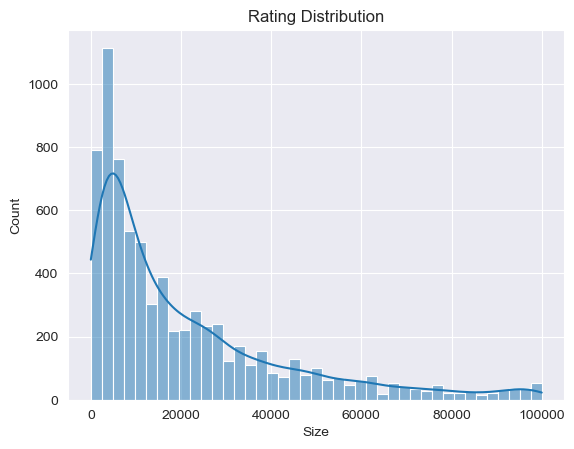

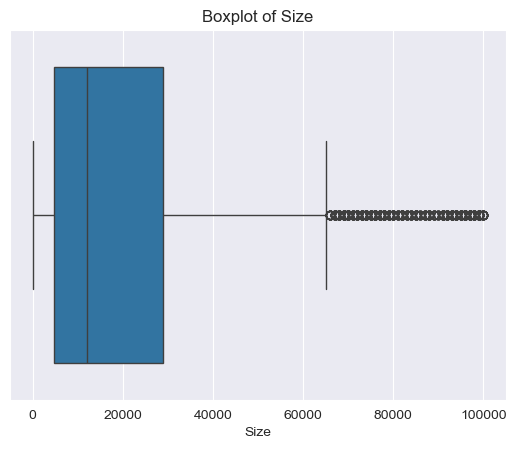

In [1222]:
sns.histplot(df['Size'].dropna(), kde=True)
plt.title('Rating Distribution')
plt.show()

# Boxplot
sns.boxplot(x=df['Size'])
plt.title('Boxplot of Size')
plt.show()

as data has outliers and skewed we replace missing values median

In [1223]:
df['Size'] = df['Size'].fillna(df['Size'].median())
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)


In [1224]:
df.isnull().sum()

App Name                0
Category                0
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genre                   0
Current Version         7
Android Version         2
Y                    1465
Days_Since_Update       0
dtype: int64

In [1225]:

print("Rows before:", len(df))
df = df[df['Y'].notna()]
print("Rows after dropping missing y:", len(df))


Rows before: 8657
Rows after dropping missing y: 7192


In [1226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           7192 non-null   object 
 1   Category           7192 non-null   object 
 2   Reviews            7192 non-null   int64  
 3   Size               7192 non-null   float64
 4   Installs           7192 non-null   int64  
 5   Type               7192 non-null   object 
 6   Price              7192 non-null   float64
 7   Content Rating     7192 non-null   object 
 8   Genre              7192 non-null   object 
 9   Current Version    7189 non-null   object 
 10  Android Version    7190 non-null   object 
 11  Y                  7192 non-null   float64
 12  Days_Since_Update  7192 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 786.6+ KB


In [1227]:
df.isnull().sum()

App Name             0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genre                0
Current Version      3
Android Version      2
Y                    0
Days_Since_Update    0
dtype: int64

In [1228]:
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Current Version,Android Version,Y,Days_Since_Update
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.9,205
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.3,49
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,Free,0.0,Everyone,Art & Design,1.0,2.3 and up,4.4,500
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,Free,0.0,Everyone,Art & Design,1.1,4.0.3 and up,3.8,104


In [1229]:
total_rows = len(df)
varies_count = sum(df['Android Version'] == 'Varies with device')
varies_fraction = varies_count / total_rows

print("Count of 'Varies with device':", varies_count)
print("Fraction of 'Varies with device': {:.2%}".format(varies_fraction))

Count of 'Varies with device': 960
Fraction of 'Varies with device': 13.35%


In [1230]:
unique_versions = df['Android Version'].unique()
unique_count = len(unique_versions)

print("Number of unique Android Versions:", unique_count)


Number of unique Android Versions: 32


In [1231]:
df['Is_Varies_Android'] = df['Android Version'] == 'Varies with device'
df['Is_Varies_Current'] = df['Current Version'] == 'Varies with device'

print(df.groupby('Is_Varies_Android')['Y'].mean())
print(df.groupby('Is_Varies_Current')['Y'].mean())


Is_Varies_Android
False    4.169031
True     4.276354
Name: Y, dtype: float64
Is_Varies_Current
False    4.169319
True     4.266860
Name: Y, dtype: float64


In [1232]:


group_varies = df[df['Is_Varies_Android']]['Y'].dropna()
group_not_varies = df[~df['Is_Varies_Android']]['Y'].dropna()

stat, p = ttest_ind(group_varies, group_not_varies)
print(f"T-test p-value: {p}")


T-test p-value: 3.559048908837114e-09


In [1233]:
group_varies = df[df['Is_Varies_Current']]['Y'].dropna()
group_not_varies = df[~df['Is_Varies_Current']]['Y'].dropna()

stat, p = ttest_ind(group_varies, group_not_varies)
print(f"T-test p-value: {p}")


T-test p-value: 3.084514079542353e-08


they are significant

In [1234]:
def version_to_float(version):
    if pd.isna(version):
        return np.nan
    if version == -1:
        return -1
    parts = version.strip().split('.')
    parts = [int(p) if p.isdigit() else 0 for p in parts]
    while len(parts) < 4:
        parts.append(0)
    return float(f"{parts[0]}.{parts[1]:02d}{parts[2]:02d}{parts[3]:02d}")

df['Current Version'] = df['Current Version'].replace('Varies with device', -1)
df['Android Version'] = df['Android Version'].replace('Varies with device', -1)
df['Current Version Num'] = df['Current Version'].apply(version_to_float)
df['Android Version Clean'] = df['Android Version'].str.replace('and up', '', regex=False).str.strip()
df['Android Version Num'] = df['Android Version Clean'].apply(version_to_float)



In [1235]:
mask = df['Current Version'].isna()

# show both columns for those rows
missing_versions = df.loc[mask, ['Current Version', 'Current Version Num']]
print(missing_versions)


     Current Version  Current Version Num
10               NaN                  NaN
1123             NaN                  NaN
4866             NaN                  NaN


In [1236]:
df['Current Version Num'].fillna(df['Current Version Num'].median(), inplace=True)
df['Android Version Num'].fillna(df['Android Version Num'].median(), inplace=True)


In [1237]:
mask = df['Current Version'].isna()

# show both columns for those rows
missing_versions = df.loc[mask, ['Current Version', 'Current Version Num']]
print(missing_versions)

     Current Version  Current Version Num
10               NaN               1.0903
1123             NaN               1.0903
4866             NaN               1.0903


In [1238]:
df[['Android Version', 'Android Version Num']]

,Android Version,Android Version Num
0,4.0.3 and up,4.0003
1,4.0.3 and up,4.0003
2,4.4 and up,4.0400
3,2.3 and up,2.0300
4,4.0.3 and up,4.0003
...,...,...
8651,2.2 and up,2.0200
8652,4.1 and up,4.0100
8654,4.1 and up,4.0100
8655,4.1 and up,4.0100


In [1239]:
df.isnull().sum()

App Name                   0
Category                   0
Reviews                    0
Size                       0
Installs                   0
Type                       0
Price                      0
Content Rating             0
Genre                      0
Current Version            3
Android Version            2
Y                          0
Days_Since_Update          0
Is_Varies_Android          0
Is_Varies_Current          0
Current Version Num        0
Android Version Clean    962
Android Version Num        0
dtype: int64

In [1240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   App Name               7192 non-null   object 
 1   Category               7192 non-null   object 
 2   Reviews                7192 non-null   int64  
 3   Size                   7192 non-null   float64
 4   Installs               7192 non-null   int64  
 5   Type                   7192 non-null   object 
 6   Price                  7192 non-null   float64
 7   Content Rating         7192 non-null   object 
 8   Genre                  7192 non-null   object 
 9   Current Version        7189 non-null   object 
 10  Android Version        7190 non-null   object 
 11  Y                      7192 non-null   float64
 12  Days_Since_Update      7192 non-null   int64  
 13  Is_Varies_Android      7192 non-null   bool   
 14  Is_Varies_Current      7192 non-null   bool   
 15  Current V

In [1241]:
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Current Version,Android Version,Y,Days_Since_Update,Is_Varies_Android,Is_Varies_Current,Current Version Num,Android Version Clean,Android Version Num
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.9,205,False,False,2.0000,4.0.3,4.0003
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,7,False,False,1.0204,4.0.3,4.0003
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.3,49,False,False,1.0100,4.4,4.0400
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,Free,0.0,Everyone,Art & Design,1.0,2.3 and up,4.4,500,False,False,1.0000,2.3,2.0300
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,Free,0.0,Everyone,Art & Design,1.1,4.0.3 and up,3.8,104,False,False,1.0100,4.0.3,4.0003


Type

In [1242]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [1243]:
# Check if all Free apps have Price = 0
free_check = df[df['Type'] == 'Free']['Price'].eq(0.0).all()

# Check if all Paid apps have Price > 0
paid_check = df[df['Type'] == 'Paid']['Price'].gt(0.0).all()

print("Free apps have Price 0:", free_check)
print("Paid apps have Price > 0:", paid_check)


Free apps have Price 0: True
Paid apps have Price > 0: True


In [1244]:
df.drop(columns=['Type'], inplace=True)


In [1245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   App Name               7192 non-null   object 
 1   Category               7192 non-null   object 
 2   Reviews                7192 non-null   int64  
 3   Size                   7192 non-null   float64
 4   Installs               7192 non-null   int64  
 5   Price                  7192 non-null   float64
 6   Content Rating         7192 non-null   object 
 7   Genre                  7192 non-null   object 
 8   Current Version        7189 non-null   object 
 9   Android Version        7190 non-null   object 
 10  Y                      7192 non-null   float64
 11  Days_Since_Update      7192 non-null   int64  
 12  Is_Varies_Android      7192 non-null   bool   
 13  Is_Varies_Current      7192 non-null   bool   
 14  Current Version Num    7192 non-null   float64
 15  Android V

Category

In [1246]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [1247]:
df['Genre'].unique()

array(['Art & Design;Pretend Play', 'Art & Design',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Brain Games',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure;Action & Adventure', 'Arcade', 'Casual',
       'Card', 'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Sports',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia'

In [1248]:
df['genre_list'] = df['Genre'].apply(lambda x: x.split(';'))
df['genre_list']

0       [Art & Design, Pretend Play]
1                     [Art & Design]
2         [Art & Design, Creativity]
3                     [Art & Design]
4                     [Art & Design]
                    ...             
8651             [Books & Reference]
8652                     [Education]
8654                     [Education]
8655                     [Education]
8657                     [Lifestyle]
Name: genre_list, Length: 7192, dtype: object

In [1249]:

# # Create a MultiLabelBinarizer instance and fit/transform the genre_list
# mlb = MultiLabelBinarizer()
# genre_encoded = mlb.fit_transform(df['genre_list'])
#
# # Convert the result into a DataFrame with corresponding column names
# genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)
#
# # Concatenate the original DataFrame with the one-hot-encoded columns
# df = pd.concat([df, genre_encoded_df], axis=1)
# df.columns


In [1250]:
from collections import Counter

# Step 1: Count genre frequency across all rows
genre_counts = Counter(genre for genres in df['genre_list'] for genre in genres)

# Step 2: Define threshold for rare genres
threshold = 100  # genres appearing less than this will be considered "rare"
rare_genres = {genre for genre, count in genre_counts.items() if count < threshold}
# Flatten all genres from the column into one list
all_genres = [genre for genres in df['genre_list'] for genre in genres]

# Get unique genres in the dataset
unique_genres = set(all_genres)

# Get common genres only (not rare)
common_genres = unique_genres - rare_genres

# Convert to list if needed
print(list(common_genres))


# Step 3: Add "Other" column: 1 if any rare genre exists in the row
df['Other'] = df['genre_list'].apply(lambda genres: int(any(genre in rare_genres for genre in genres)))

# Step 4: One-hot encode all genres (including rare ones)
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre_list'])

# Step 5: Convert to DataFrame
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)

# Step 6: Concatenate with original DataFrame
df = pd.concat([df, genre_encoded_df], axis=1)

# Step 7: Drop genre_list if no longer needed
df.drop(columns='genre_list', inplace=True)



['Communication', 'Productivity', 'Sports', 'Action', 'Puzzle', 'Lifestyle', 'Entertainment', 'News & Magazines', 'Books & Reference', 'Finance', 'Travel & Local', 'Tools', 'Social', 'Business', 'Education', 'Health & Fitness', 'Maps & Navigation', 'Simulation', 'Arcade', 'Casual', 'Medical', 'Action & Adventure', 'Shopping', 'Personalization', 'Video Players & Editors', 'Dating', 'Photography']


In [1251]:
df

,App Name,Category,Reviews,Size,Installs,Price,Content Rating,Genre,Current Version,Android Version,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,...,0,0,0,0,0,0,0,0,0,0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,...,0,0,0,0,0,0,0,0,0,0
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,...,0,0,0,0,0,0,0,0,0,0
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,0.0,Everyone,Art & Design,1.0,2.3 and up,...,0,0,0,0,0,0,0,0,0,0
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,0.0,Everyone,Art & Design,1.1,4.0.3 and up,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,Chemin (fr),BOOKS_AND_REFERENCE,44,619.0,1000,0.0,Everyone,Books & Reference,0.8,2.2 and up,...,0,0,0,0,0,0,0,0,0,0
8652,FR Calculator,FAMILY,7,2600.0,500,0.0,Everyone,Education,1.0.0,4.1 and up,...,0,0,0,0,0,0,0,0,0,0
8654,Sya9a Maroc - FR,FAMILY,38,53000.0,5000,0.0,Everyone,Education,1.48,4.1 and up,...,0,0,0,0,0,0,0,0,0,0
8655,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600.0,100,0.0,Everyone,Education,1.0,4.1 and up,...,0,0,0,0,0,0,0,0,0,0


In [1252]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [1253]:
categories = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
              'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
              'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
              'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
              'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
              'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
              'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
              'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


category_map = {cat: i for i, cat in enumerate(categories)}


df['Category_Encoded'] = df['Category'].map(category_map)

In [1254]:
df['Cat_Categorical'] = df['Category']

df = pd.get_dummies(df, columns=['Category'], prefix='One_Hot_Cat')

In [1255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 105 entries, App Name to One_Hot_Cat_WEATHER
dtypes: bool(35), float64(5), int64(58), object(7)
memory usage: 4.1+ MB


In [1256]:
df.head(100)

,App Name,Reviews,Size,Installs,Price,Content Rating,Genre,Current Version,Android Version,Y,...,One_Hot_Cat_PERSONALIZATION,One_Hot_Cat_PHOTOGRAPHY,One_Hot_Cat_PRODUCTIVITY,One_Hot_Cat_SHOPPING,One_Hot_Cat_SOCIAL,One_Hot_Cat_SPORTS,One_Hot_Cat_TOOLS,One_Hot_Cat_TRAVEL_AND_LOCAL,One_Hot_Cat_VIDEO_PLAYERS,One_Hot_Cat_WEATHER
0,Coloring book moana,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.9,...,False,False,False,False,False,False,False,False,False,False
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700.0,5000000,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,...,False,False,False,False,False,False,False,False,False,False
2,Pixel Draw - Number Art Coloring Book,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.3,...,False,False,False,False,False,False,False,False,False,False
3,Paper flowers instructions,167,5600.0,50000,0.0,Everyone,Art & Design,1.0,2.3 and up,4.4,...,False,False,False,False,False,False,False,False,False,False
4,Smoke Effect Photo Maker - Smoke Editor,178,19000.0,50000,0.0,Everyone,Art & Design,1.1,4.0.3 and up,3.8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,E-Book Read - Read Book for free,1857,4900.0,50000,0.0,Everyone,Books & Reference,1.3.2,4.4 and up,4.5,...,False,False,False,False,False,False,False,False,False,False
103,Download free book with green book,4478,9500.0,100000,0.0,Everyone 10+,Books & Reference,1.1,4.0 and up,4.6,...,False,False,False,False,False,False,False,False,False,False
104,Wikipedia,577550,12000.0,10000000,0.0,Everyone,Books & Reference,-1,-1,4.4,...,False,False,False,False,False,False,False,False,False,False
105,Amazon Kindle,814080,12000.0,100000000,0.0,Teen,Books & Reference,-1,-1,4.2,...,False,False,False,False,False,False,False,False,False,False


In [1257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 105 entries, App Name to One_Hot_Cat_WEATHER
dtypes: bool(35), float64(5), int64(58), object(7)
memory usage: 4.1+ MB


In [1258]:
for col in df.columns:
    if col.startswith('One_Hot_Cat') or col.startswith('Is_Varies'):
        df[col] = df[col].astype(int)

In [1259]:
df.drop(columns=['Current Version','Android Version','Android Version Clean'], inplace=True)

In [1260]:
df.head()

,App Name,Reviews,Size,Installs,Price,Content Rating,Genre,Y,Days_Since_Update,Is_Varies_Android,...,One_Hot_Cat_PERSONALIZATION,One_Hot_Cat_PHOTOGRAPHY,One_Hot_Cat_PRODUCTIVITY,One_Hot_Cat_SHOPPING,One_Hot_Cat_SOCIAL,One_Hot_Cat_SPORTS,One_Hot_Cat_TOOLS,One_Hot_Cat_TRAVEL_AND_LOCAL,One_Hot_Cat_VIDEO_PLAYERS,One_Hot_Cat_WEATHER
0,Coloring book moana,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,3.9,205,0,...,0,0,0,0,0,0,0,0,0,0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700.0,5000000,0.0,Everyone,Art & Design,4.7,7,0,...,0,0,0,0,0,0,0,0,0,0
2,Pixel Draw - Number Art Coloring Book,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity,4.3,49,0,...,0,0,0,0,0,0,0,0,0,0
3,Paper flowers instructions,167,5600.0,50000,0.0,Everyone,Art & Design,4.4,500,0,...,0,0,0,0,0,0,0,0,0,0
4,Smoke Effect Photo Maker - Smoke Editor,178,19000.0,50000,0.0,Everyone,Art & Design,3.8,104,0,...,0,0,0,0,0,0,0,0,0,0


In [1261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 102 entries, App Name to One_Hot_Cat_WEATHER
dtypes: float64(5), int64(93), object(4)
memory usage: 5.7+ MB


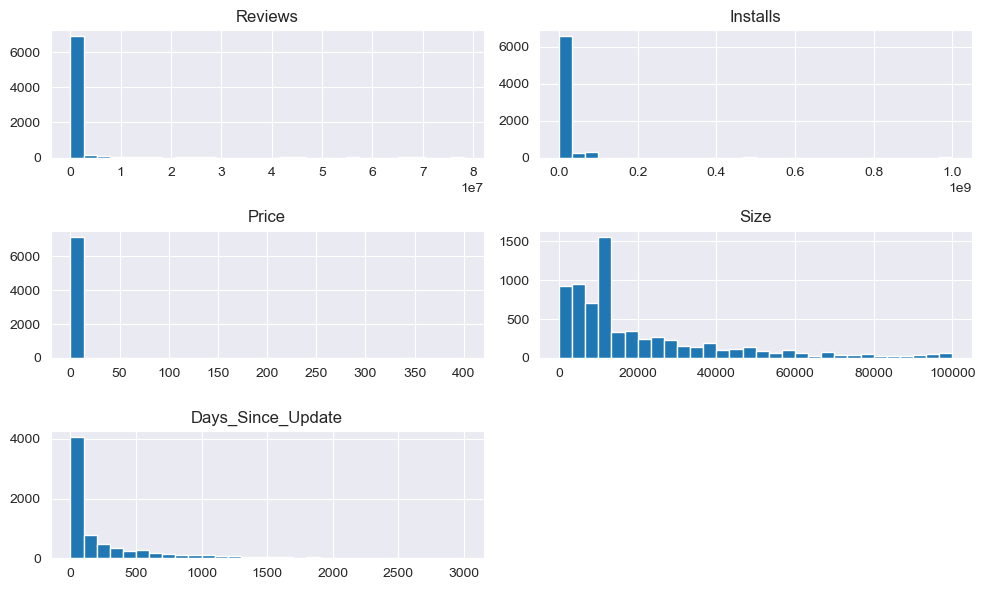

In [1262]:

numeric_cols = ['Reviews', 'Installs', 'Price','Size', 'Days_Since_Update']
df[numeric_cols].hist(bins=30, figsize=(10, 6))  # Plot histograms
plt.tight_layout()
plt.show()


In [1263]:

df['Reviews_log'] = np.log1p(df['Reviews'])      # np.log1p(x) = log(x + 1)
df['Installs_log'] = np.log1p(df['Installs'])
df['Price_log'] = np.log1p(df['Price'])
df['Days_Since_Update_log'] = np.log1p(df['Days_Since_Update'])


In [1264]:
df['Size_log'] = np.log(df['Size'])

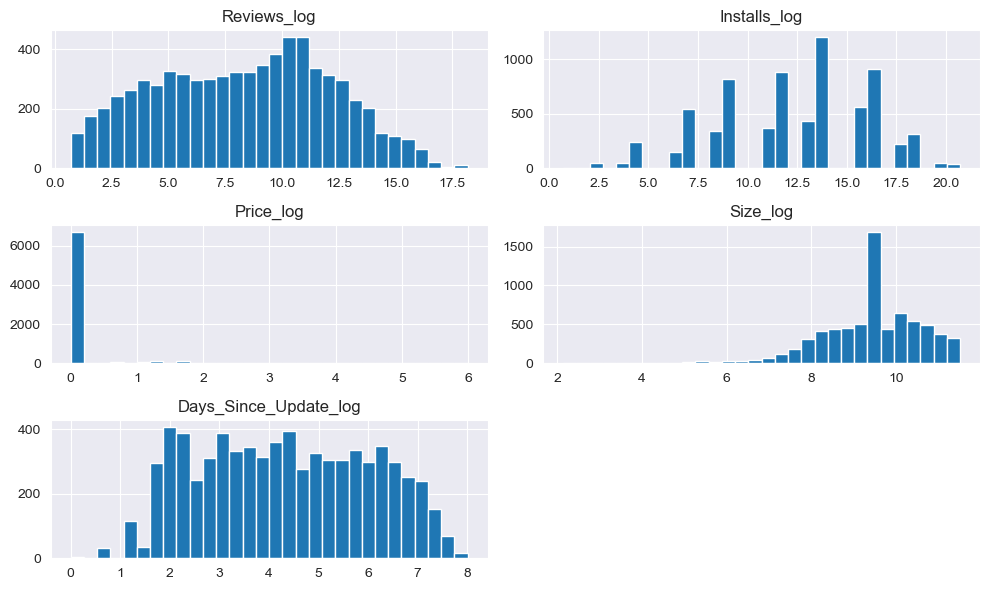

In [1265]:
numeric_cols = ['Reviews_log', 'Installs_log', 'Price_log','Size_log', 'Days_Since_Update_log']
df[numeric_cols].hist(bins=30, figsize=(10, 6))  # Plot histograms
plt.tight_layout()
plt.show()

In [1266]:
df['Is_Free'] = (df['Price'] == 0).astype(int)

In [1267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 108 entries, App Name to Is_Free
dtypes: float64(10), int64(94), object(4)
memory usage: 6.0+ MB


In [1268]:
df['Content Rating'].unique()

array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [1269]:
rating_order = {
    'Everyone': 0,
    'Everyone 10+': 1,
    'Teen': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': -1  # or 5, depending on your choice
}


In [1270]:
df_temp = df.copy()
df_temp.drop(columns=['App Name', 'Content Rating', 'Cat_Categorical','Genre'], inplace=True)

,Reviews,Size,Installs,Price,Y,Days_Since_Update,Is_Varies_Android,Is_Varies_Current,Current Version Num,Android Version Num,...,One_Hot_Cat_TOOLS,One_Hot_Cat_TRAVEL_AND_LOCAL,One_Hot_Cat_VIDEO_PLAYERS,One_Hot_Cat_WEATHER,Reviews_log,Installs_log,Price_log,Days_Since_Update_log,Size_log,Is_Free
Reviews,1.000000,0.110382,0.602556,-0.009341,0.069742,-0.088772,0.144985,0.141390,-0.006235,0.030187,...,-0.015176,-0.011772,0.005469,-0.008642,0.317003,0.280070,-0.036639,-0.145993,0.093738,0.042773
Size,0.110382,1.000000,0.034534,-0.016115,0.065143,-0.186506,-0.156586,-0.153691,-0.015574,0.110042,...,-0.169189,-0.001530,-0.031524,-0.029494,0.261883,0.226108,-0.016663,-0.178437,0.802621,0.011321
Installs,0.602556,0.034534,1.000000,-0.011148,0.050642,-0.103459,0.231709,0.224037,-0.007077,0.043268,...,-0.010143,0.025226,0.031953,-0.011330,0.334149,0.350154,-0.044660,-0.182577,0.063106,0.051866
Price,-0.009341,-0.016115,-0.011148,1.000000,-0.025599,0.004512,-0.017332,-0.018251,-0.000889,0.003519,...,-0.011657,-0.006843,-0.007101,-0.003572,-0.043586,-0.059993,0.567742,0.023956,-0.023907,-0.213948
Y,0.069742,0.065143,0.050642,-0.025599,1.000000,-0.139851,0.069540,0.065227,-0.004717,0.061028,...,-0.082731,-0.037139,-0.036831,0.018155,0.220790,0.129436,0.020418,-0.180696,0.086115,-0.044166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Installs_log,0.280070,0.226108,0.350154,-0.059993,0.129436,-0.274641,0.321269,0.330377,-0.017276,0.094844,...,-0.040629,0.016453,0.035027,0.036172,0.957359,1.000000,-0.233675,-0.402078,0.294898,0.275060
Price_log,-0.036639,-0.016663,-0.044660,0.567742,0.020418,0.129112,-0.027561,-0.030950,0.005529,-0.076649,...,0.004155,-0.012497,-0.020951,0.000289,-0.154523,-0.233675,1.000000,0.129616,-0.063756,-0.860700
Days_Since_Update_log,-0.145993,-0.178437,-0.182577,0.023956,-0.180696,0.787815,-0.235472,-0.238417,-0.012516,-0.436536,...,0.078788,-0.046089,-0.000684,-0.032071,-0.414258,-0.402078,0.129616,1.000000,-0.324909,-0.157658
Size_log,0.093738,0.802621,0.063106,-0.023907,0.086115,-0.381153,-0.002105,0.005575,-0.028639,0.255478,...,-0.235189,0.026577,-0.020175,-0.006896,0.324607,0.294898,-0.063756,-0.324909,1.000000,0.071621


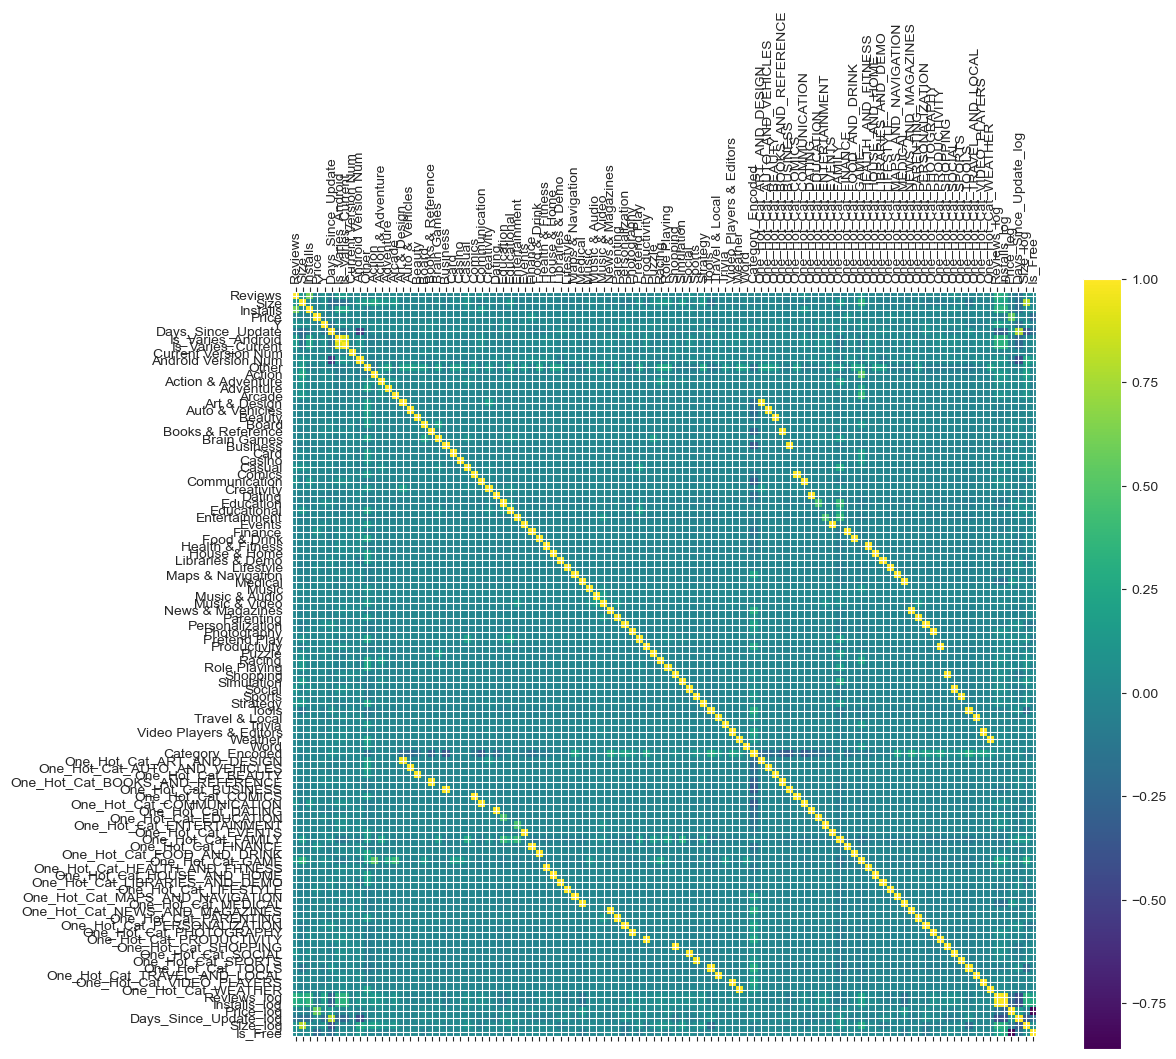

In [1271]:
corr_matrix = df_temp.corr()
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr_matrix, cmap='viridis')
fig.colorbar(cax)

# Set up axes to show feature names
ticks = range(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
corr_matrix


In [1272]:

threshold = 0.88                     # change this if you wish

# absolute values of the correlations
corr_abs = corr_matrix.abs()

# keep only one copy of each pair (upper triangle, no diagonal)
mask  = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
upper = corr_abs.where(mask)

# tidy DataFrame of pairs, sorted high → low
pairs_df = (
    upper.stack()
         .reset_index()
         .rename(columns={'level_0': 'feature_1',
                          'level_1': 'feature_2',
                          0: 'abs_corr'})
         .query('abs_corr >= @threshold')
         .sort_values('abs_corr', ascending=False)   # ← sorted here
         .reset_index(drop=True)
)

display(pairs_df)                   # nice HTML table in Jupyter



,feature_1,feature_2,abs_corr
0,Libraries & Demo,One_Hot_Cat_LIBRARIES_AND_DEMO,1.000000
1,Tools,One_Hot_Cat_TOOLS,1.000000
2,Photography,One_Hot_Cat_PHOTOGRAPHY,1.000000
3,Personalization,One_Hot_Cat_PERSONALIZATION,1.000000
4,Parenting,One_Hot_Cat_PARENTING,1.000000
5,News & Magazines,One_Hot_Cat_NEWS_AND_MAGAZINES,1.000000
6,Medical,One_Hot_Cat_MEDICAL,1.000000
7,Maps & Navigation,One_Hot_Cat_MAPS_AND_NAVIGATION,1.000000
8,Social,One_Hot_Cat_SOCIAL,1.000000
9,Weather,One_Hot_Cat_WEATHER,1.000000


consider removing (installs or reviews) and (is_varies_android or is_varies_current)

In [1273]:
cols_to_drop = pairs_df['feature_2'].unique().tolist()
print(f"\nColumns to be dropped (feature_2 side of each pair):\n{cols_to_drop}")

# ── 3. drop them from your DataFrame  ────────────────────────────
df = df.drop(columns=cols_to_drop)     # use inplace=True if preferred
print(f"\nNew shape of df: {df.shape}")


Columns to be dropped (feature_2 side of each pair):
['One_Hot_Cat_LIBRARIES_AND_DEMO', 'One_Hot_Cat_TOOLS', 'One_Hot_Cat_PHOTOGRAPHY', 'One_Hot_Cat_PERSONALIZATION', 'One_Hot_Cat_PARENTING', 'One_Hot_Cat_NEWS_AND_MAGAZINES', 'One_Hot_Cat_MEDICAL', 'One_Hot_Cat_MAPS_AND_NAVIGATION', 'One_Hot_Cat_SOCIAL', 'One_Hot_Cat_WEATHER', 'One_Hot_Cat_HOUSE_AND_HOME', 'One_Hot_Cat_FOOD_AND_DRINK', 'One_Hot_Cat_SHOPPING', 'One_Hot_Cat_FINANCE', 'One_Hot_Cat_EVENTS', 'One_Hot_Cat_DATING', 'One_Hot_Cat_COMICS', 'One_Hot_Cat_BUSINESS', 'One_Hot_Cat_TRAVEL_AND_LOCAL', 'One_Hot_Cat_BEAUTY', 'One_Hot_Cat_AUTO_AND_VEHICLES', 'One_Hot_Cat_PRODUCTIVITY', 'One_Hot_Cat_COMMUNICATION', 'One_Hot_Cat_LIFESTYLE', 'One_Hot_Cat_HEALTH_AND_FITNESS', 'One_Hot_Cat_BOOKS_AND_REFERENCE', 'One_Hot_Cat_VIDEO_PLAYERS', 'One_Hot_Cat_SPORTS', 'One_Hot_Cat_ART_AND_DESIGN', 'Installs_log', 'Is_Varies_Current']

New shape of df: (7192, 77)


In [1274]:
df['Content Rating'].unique()

array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [1275]:
rating_order = {
    'Everyone': 0,
    'Everyone 10+': 1,
    'Teen': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': -1  # or 5, depending on how you want to treat "Unrated"
}

In [1276]:
df['content_rating_ordinal'] = df['Content Rating'].map(rating_order)

In [1277]:
df['content_rating_Categorical'] = df['Content Rating']

In [1278]:
df = pd.get_dummies(df, columns=['Content Rating'], prefix='rating')

In [1279]:
df_temp = df.copy()
df_temp.drop(columns=['App Name', 'content_rating_Categorical', 'Cat_Categorical','Genre'], inplace=True)

,Reviews,Size,Installs,Price,Y,Days_Since_Update,Is_Varies_Android,Current Version Num,Android Version Num,Other,...,Days_Since_Update_log,Size_log,Is_Free,content_rating_ordinal,rating_Adults only 18+,rating_Everyone,rating_Everyone 10+,rating_Mature 17+,rating_Teen,rating_Unrated
Reviews,1.000000,0.110382,0.602556,-0.009341,0.069742,-0.088772,0.144985,-0.006235,0.030187,-0.011717,...,-0.145993,0.093738,0.042773,0.055522,-0.003156,-0.081785,0.081639,-0.005942,0.056661,-0.001926
Size,0.110382,1.000000,0.034534,-0.016115,0.065143,-0.186506,-0.156586,-0.015574,0.110042,0.180448,...,-0.178437,0.802621,0.011321,0.162241,-0.001564,-0.201545,0.142179,0.033169,0.144302,-0.007921
Installs,0.602556,0.034534,1.000000,-0.011148,0.050642,-0.103459,0.231709,-0.007077,0.043268,-0.053445,...,-0.182577,0.063106,0.051866,0.036995,-0.003784,-0.050354,0.027572,-0.013155,0.055376,-0.002267
Price,-0.009341,-0.016115,-0.011148,1.000000,-0.025599,0.004512,-0.017332,-0.000889,0.003519,-0.015441,...,0.023956,-0.023907,-0.213948,-0.010911,-0.001184,0.010913,-0.005938,-0.008860,-0.004112,-0.000684
Y,0.069742,0.065143,0.050642,-0.025599,1.000000,-0.139851,0.069540,-0.004717,0.061028,0.037845,...,-0.180696,0.086115,-0.044166,0.017246,0.004540,-0.030987,0.031401,-0.018744,0.031755,-0.001873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rating_Everyone,-0.081785,-0.201545,-0.050354,0.010913,-0.030987,0.071586,-0.024983,-0.000412,0.001058,-0.068588,...,0.109047,-0.200261,-0.030901,-0.938580,-0.040286,1.000000,-0.407859,-0.437941,-0.714254,-0.023256
rating_Everyone 10+,0.081639,0.142179,0.027572,-0.005938,0.031401,-0.023238,-0.000777,0.009398,0.007066,0.096705,...,-0.026209,0.129576,-0.016161,0.138486,-0.004225,-0.407859,1.000000,-0.045927,-0.074904,-0.002439
rating_Mature 17+,-0.005942,0.033169,-0.013155,-0.008860,-0.018744,-0.054469,0.022956,-0.008772,0.019014,-0.060986,...,-0.082730,0.051749,0.021139,0.657476,-0.004536,-0.437941,-0.045927,1.000000,-0.080428,-0.002619
rating_Teen,0.056661,0.144302,0.055376,-0.004112,0.031755,-0.041286,0.016186,0.000564,-0.017742,0.065270,...,-0.066112,0.137931,0.034496,0.657410,-0.007399,-0.714254,-0.074904,-0.080428,1.000000,-0.004271


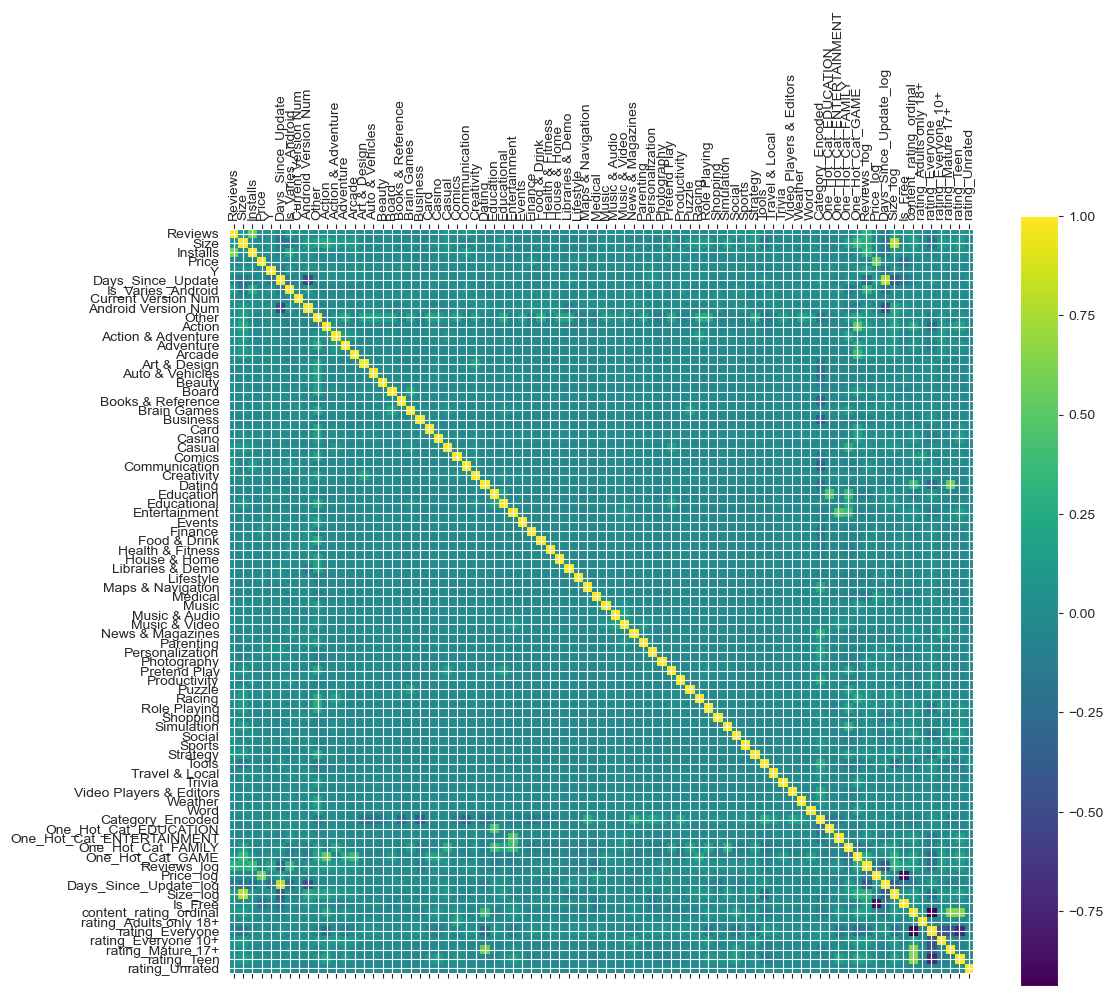

In [1280]:
corr_matrix = df_temp.corr()
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr_matrix, cmap='viridis')
fig.colorbar(cax)

# Set up axes to show feature names
ticks = range(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
corr_matrix

In [1281]:
df.columns

Index(['App Name', 'Reviews', 'Size', 'Installs', 'Price', 'Genre', 'Y',
       'Days_Since_Update', 'Is_Varies_Android', 'Current Version Num',
       'Android Version Num', 'Other', 'Action', 'Action & Adventure',
       'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty',
       'Board', 'Books & Reference', 'Brain Games', 'Business', 'Card',
       'Casino', 'Casual', 'Comics', 'Communication', 'Creativity', 'Dating',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio',
       'Music & Video', 'News & Magazines', 'Parenting', 'Personalization',
       'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing',
       'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports',
       'Strategy', 'Tools', 'Travel & Local', 'Trivia',
       'Video Players & Editors', 'Weather', 'Word', '

In [1282]:
category_means = df.groupby('Cat_Categorical')['Y'].mean()

df['Category_Mean'] = df['Cat_Categorical'].map(category_means)

In [1283]:
Genre_means = df.groupby('Genre')['Y'].mean()

df['Genre_Mean'] = df['Genre'].map(Genre_means)

In [1284]:
Content_Rating_means = df.groupby('content_rating_Categorical')['Y'].mean()

df['Content_Rating_Mean'] = df['content_rating_Categorical'].map(Content_Rating_means)

In [1285]:
X = df
y = df['Y']

In [1286]:
X.drop(columns=['Genre',"content_rating_Categorical","Cat_Categorical", "Y"], inplace=True)

In [1287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1288]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#selector = SelectKBest(score_func=f_classif, k=10)
#X_train_selected = selector.fit_transform(X_train_scaled, y_train)
#X_test_selected = selector.transform(X_test_scaled)

In [1289]:
classifiers = {
    # Baselines (kept)
#     'RF_200_depthNone'      : RandomForestClassifier(n_estimators=200,  max_depth=None, min_samples_leaf=1,
#                                                      n_jobs=-1),
#     'RF_400_depth20'        : RandomForestClassifier(n_estimators=400,  max_depth=20,  min_samples_leaf=2,
#                                                      class_weight='balanced', n_jobs=-1),
#     'RF_600_depth10'        : RandomForestClassifier(n_estimators=600,  max_depth=10,  min_samples_leaf=5,
#                                                      n_jobs=-1),
#
#     # ─── NEW Random‑Forest probes ───
#     'RF_500_depth8_sqrt'    : RandomForestClassifier(n_estimators=500,  max_depth=8,  min_samples_leaf=1,
#                                                      max_features='sqrt', class_weight='balanced',
#                                                      oob_score=True, n_jobs=-1),
#     'RF_800_depth12_log2'   : RandomForestClassifier(n_estimators=800,  max_depth=12, min_samples_leaf=2,
#                                                      max_features='log2', class_weight='balanced_subsample',
#                                                      oob_score=True, n_jobs=-1),
#     'RF_1000_depth15_frac'  : RandomForestClassifier(n_estimators=1000, max_depth=15,min_samples_leaf=3,
#                                                      max_features=0.6,   class_weight='balanced_subsample',
#                                                      oob_score=True, n_jobs=-1),
#
#     # ─── XGBoost baselines (kept) ───
#     'XGB_depth4_lr0.1'      : XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1,
#                                             subsample=0.8, colsample_bytree=0.8,
#                                             objective='multi:softprob', n_jobs=-1),
#     'XGB_depth6_lr0.05'     : XGBClassifier(n_estimators=400, max_depth=6, learning_rate=0.05,
#                                             subsample=0.8, colsample_bytree=0.8,
#                                             objective='multi:softprob', n_jobs=-1),
#     'XGB_depth8_lr0.03'     : XGBClassifier(n_estimators=600, max_depth=8, learning_rate=0.03,
#                                             subsample=0.7, colsample_bytree=0.7,
#                                             objective='multi:softprob', n_jobs=-1),
#
#     # ─── NEW XGBoost probes ───
#     'XGB_depth5_lr0.07_col0.9' : XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.07,
#                                                subsample=0.8, colsample_bytree=0.9,
#                                                reg_lambda=1.0, reg_alpha=0.0,
#                                                objective='multi:softprob', n_jobs=-1),
#     'XGB_depth6_lr0.05_L2.5'   : XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.05,
#                                                subsample=0.85, colsample_bytree=0.8,
#                                                reg_lambda=2.5, reg_alpha=0.0,
#                                                objective='multi:softprob', n_jobs=-1),
}

In [1290]:
regressors = {
    # # Baselines (kept)
    # 'RF_200_depthNone'      : RandomForestRegressor(n_estimators=200,  max_depth=None, min_samples_leaf=1,  n_jobs=-1),
    # 'RF_400_depth20'        : RandomForestRegressor(n_estimators=400,  max_depth=20,  min_samples_leaf=2,  n_jobs=-1),
    # 'RF_600_depth10'        : RandomForestRegressor(n_estimators=600,  max_depth=10,  min_samples_leaf=5,  n_jobs=-1),
    #
    # # ─── NEW Random‑Forest probes (sweet‑spot grid) ───
    # 'RF_500_depth8_sqrt'    : RandomForestRegressor(n_estimators=500,  max_depth=8,   min_samples_leaf=1,
    #                                                 max_features='sqrt', oob_score=True, n_jobs=-1),
    # 'RF_800_depth12_log2'   : RandomForestRegressor(n_estimators=800,  max_depth=12,  min_samples_leaf=2,
    #                                                 max_features='log2', oob_score=True, n_jobs=-1),
    # 'RF_1000_depth15_frac'  : RandomForestRegressor(n_estimators=1000, max_depth=15, min_samples_leaf=3,
    #                                                 max_features=0.6,    oob_score=True, n_jobs=-1),
    'RF_700_depthNone_frac' : RandomForestRegressor(n_estimators=700,  max_depth=None,min_samples_leaf=5,
                                                    max_features=0.6,    oob_score=True, n_jobs=-1),
    #
    # # ─── XGBoost baselines (kept) ───
    # 'XGB_depth4_lr0.1'      : XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.1,
    #                                        subsample=0.8, colsample_bytree=0.8,
    #                                        objective='reg:squarederror', n_jobs=-1),
    # 'XGB_depth6_lr0.05'     : XGBRegressor(n_estimators=400, max_depth=6, learning_rate=0.05,
    #                                        subsample=0.8, colsample_bytree=0.8,
    #                                        objective='reg:squarederror', n_jobs=-1),
    # 'XGB_depth8_lr0.03'     : XGBRegressor(n_estimators=600, max_depth=8, learning_rate=0.03,
    #                                        subsample=0.7, colsample_bytree=0.7,
    #                                        objective='reg:squarederror', n_jobs=-1),
    #
    # # ─── NEW XGBoost probes ───
    # 'XGB_depth5_lr0.07_col0.9' : XGBRegressor(n_estimators=500, max_depth=5, learning_rate=0.07,
    #                                           subsample=0.8, colsample_bytree=0.9,
    #                                           reg_lambda=1.0, reg_alpha=0.0,
    #                                           objective='reg:squarederror', n_jobs=-1),
    # 'XGB_depth6_lr0.05_L2.5'   : XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05,
    #                                           subsample=0.85, colsample_bytree=0.8,
    #                                           reg_lambda=2.5, reg_alpha=0.0,
    #                                           objective='reg:squarederror', n_jobs=-1),
}

In [1291]:

def evaluate_classification(y_true, y_pred, y_proba=None):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_true, y_proba, multi_class='ovr'))

In [1292]:
def evaluate_regression(y_true, y_pred):
    print("R²:", r2_score(y_true, y_pred)*100 ,'%')
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

In [1293]:
y_train_int = y_train.astype(int) -1
y_test_int = y_test.astype(int) -1
for name, clf in classifiers.items():
    clf.fit(X_train, y_train_int)
    preds = clf.predict(X_test)
    proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None
    print(f"---{name}---")
    evaluate_classification(y_test_int, preds, proba)
    print("\n")


In [1294]:


# for name, reg in regressors.items():
#     reg.fit(X_train, y_train)
#     preds = reg.predict(X_test)
#     print(f"---{name}---")
#     evaluate_regression(y_test, preds)
#     print("\n")


ValueError: could not convert string to float: 'Bee Mobile EG'

In [ ]:
print("Mean:", y.mean())
print("Standard Deviation:", y.std())
print("Min:", y.min())
print("Max:", y.max())
print("Range:", y.max() - y.min())
print("Variance:", y.var())


In [ ]:
# feature_names = X_train.columns
#
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
#
# # Get feature importances
# importances = model.feature_importances_
# importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)
# # Plot
# plt.figure(figsize=(30, 18))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importance (Random Forest)')
# plt.gca().invert_yaxis()
# plt.show()


In [ ]:
# # Set a lower bound threshold (adjust as needed)
# threshold = 0.01
#
# # Get important features
# important_features = importance_df[importance_df['Importance'] >= threshold]['Feature']
#
# # Format as quoted, comma-separated list
# formatted = ', '.join([f'"{f}"' for f in important_features])
# print(formatted)


In [ ]:
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted Values')
# plt.grid(True)
# plt.show()

In [ ]:
# residuals = y_test - y_pred
#
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, residuals, alpha=0.7, edgecolors='k')
# plt.axhline(y=0, color='r', linestyle='--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Plot')
# plt.grid(True)
# plt.show()


In [ ]:
# # Train Random Forest
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
#
# # Predict
# y_pred = model.predict(X_test)
# loss_percentage = mean_absolute_percentage_error(y_test, y_pred) * 100
# accuracy = r2_score(y_test, y_pred) * 100
#
# print("Loss Percentage:", loss_percentage, "%")
# print("Accuracy (R²):", accuracy, "%")
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted Values (Random Forest)')
# plt.grid(True)
# plt.show()
# residuals = y_test - y_pred
#
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, residuals, alpha=0.7, edgecolors='k')
# plt.axhline(y=0, color='r', linestyle='--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Plot (Random Forest)')
# plt.grid(True)
# plt.show()


In [ ]:
# gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
# gbr.fit(X_train, y_train)
#
# y_pred_gbr = gbr.predict(X_test)

In [ ]:
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred_gbr, alpha=0.7, edgecolors='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted Values (gbr)')
# plt.grid(True)
# plt.show()
# residuals = y_test - y_pred_gbr
#
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, residuals, alpha=0.7, edgecolors='k')
# plt.axhline(y=0, color='r', linestyle='--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Plot (gbr)')
# plt.grid(True)
# plt.show()

In [ ]:

# y_train_int = np.round(y_train)-1
# y_test_int = np.round(y_test)-1

In [ ]:
# n_classes = len(np.unique(y_train_int))
# class_labels = np.arange(1, n_classes + 1)  # original class labels: [1, 2, 3, 4, 5]
#
# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train_int)
#
#     # Get class predictions
#     preds_class = clf.predict(X_test)
#
#     # Convert predictions back to 1-indexed for classification evaluation
#     preds_class_1based = preds_class + 1
#     y_test_1based = y_test_int + 1
#
#     # If model supports predict_proba → calculate soft float predictions
#     if hasattr(clf, "predict_proba"):
#         proba = clf.predict_proba(X_test)
#         preds_float = (proba * class_labels).sum(axis=1)
#         preds_rounded = np.clip(np.round(preds_float), 1, n_classes)
#         print(f"--- {name} floats ---")
#
#         # Regression-style error vs original float y_test
#         mae = mean_absolute_error(y_test, preds_float)
#         rmse = mean_squared_error(y_test, preds_float)
#         mape = mean_absolute_percentage_error(y_test, preds_float) * 100
#         r2 = r2_score(y_test, preds_float)
#
#         print(f"MAE (original target): {mae:.4f}")
#         print(f"RMSE (original target): {rmse:.4f}")
#         print(f"MAPE (original target): {mape:.2f}%")
#         print(f"R2 (original target): {r2*100:.2f}%")
#     else:
#         proba = None
#         preds_rounded = preds_class_1based
#
#     # Classification evaluation
#     print(f"--- {name} ---")
#     print("Accuracy:", accuracy_score(y_test_1based, preds_rounded))
#     print("F1 Score (weighted):", f1_score(y_test_1based, preds_rounded, average='weighted'))
#
#     # Regression-style error vs original float y_test
#     mae = mean_absolute_error(y_test, preds_rounded)
#     rmse = mean_squared_error(y_test, preds_rounded)
#     mape = mean_absolute_percentage_error(y_test, preds_rounded) * 100
#     r2 = r2_score(y_test, preds_float)
#
#     print(f"MAE (original target): {mae:.4f}")
#     print(f"RMSE (original target): {rmse:.4f}")
#     print(f"MAPE (original target): {mape:.2f}%")
#     print(f"R2 (original target): {r2*100:.2f}%")

In [1295]:

target               = ['Y']

numeric_raw          = ['Reviews', 'Size', 'Installs', 'Price',
                        'Days_Since_Update', 'Current Version Num',
                        'Android Version Num', 'Is_Varies_Android', 'Is_Free']
numeric_raw2          = ['Size', 'Installs', 'Price',
                        'Days_Since_Update', 'Current Version Num',
                        'Android Version Num', 'Is_Varies_Android', 'Is_Free']

numeric_log          = ['Reviews_log', 'Price_log', 'Current Version Num',
                        'Android Version Num',
                        'Days_Since_Update_log', 'Size_log', 'Is_Varies_Android', 'Is_Free']

genre_onehot         = ['Action', 'Action & Adventure', 'Adventure', 'Arcade',
                        'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board',
                        'Books & Reference', 'Brain Games', 'Business', 'Card',
                        'Casino', 'Casual', 'Comics', 'Communication',
                        'Creativity', 'Dating', 'Education', 'Educational',
                        'Entertainment', 'Events', 'Finance', 'Food & Drink',
                        'Health & Fitness', 'House & Home',
                        'Libraries & Demo', 'Lifestyle', 'Maps & Navigation',
                        'Medical', 'Music', 'Music & Audio', 'Music & Video',
                        'News & Magazines', 'Parenting', 'Personalization',
                        'Photography', 'Pretend Play', 'Productivity', 'Puzzle',
                        'Racing', 'Role Playing', 'Shopping', 'Simulation',
                        'Social', 'Sports', 'Strategy', 'Tools',
                        'Travel & Local', 'Trivia',
                        'Video Players & Editors', 'Weather', 'Word']
genre_onehot1         = ['Communication', 'Productivity', 'Sports', 'Action', 'Puzzle', 'Lifestyle', 'Entertainment', 'News & Magazines', 'Books & Reference', 'Finance', 'Travel & Local', 'Tools', 'Social', 'Business', 'Education', 'Health & Fitness', 'Maps & Navigation', 'Simulation', 'Arcade', 'Casual', 'Medical', 'Action & Adventure', 'Shopping', 'Personalization', 'Video Players & Editors', 'Dating', 'Photography', 'Other']

category_ordinal     = ['Category_Encoded']
category_label       = ['Cat_Categorical']
category_onehot      = ['One_Hot_Cat_EDUCATION', 'One_Hot_Cat_ENTERTAINMENT',
                        'One_Hot_Cat_FAMILY', 'One_Hot_Cat_GAME']

content_rating_ord   = ['content_rating_ordinal']
content_rating_lbl   = ['content_rating_Categorical']
content_rating_one   = ['rating_Adults only 18+', 'rating_Everyone',
                        'rating_Everyone 10+', 'rating_Mature 17+',
                        'rating_Teen', 'rating_Unrated']
Mean = ["Genre_Mean", "Category_Mean", "Content_Rating_Mean"]
Mean1 = [ "Category_Mean", "Content_Rating_Mean"]

custom =  ['Health & Fitness',
 'Entertainment',
 'Android Version Num',
 'Reviews_log',
 'content_rating_ordinal',
 'Size_log',
 'rating_Everyone',
 'Category_Encoded',
 'rating_Mature 17+',
 'Days_Since_Update_log',
 'Education',
 'Current Version Num']
genre_onehot1


['Communication',
 'Productivity',
 'Sports',
 'Action',
 'Puzzle',
 'Lifestyle',
 'Entertainment',
 'News & Magazines',
 'Books & Reference',
 'Finance',
 'Travel & Local',
 'Tools',
 'Social',
 'Business',
 'Education',
 'Health & Fitness',
 'Maps & Navigation',
 'Simulation',
 'Arcade',
 'Casual',
 'Medical',
 'Action & Adventure',
 'Shopping',
 'Personalization',
 'Video Players & Editors',
 'Dating',
 'Photography',
 'Other']

In [1296]:
features_num_raw     = numeric_raw                      # 9 vars
features_num_log     = numeric_log                      # 4 vars
features_num_both    = numeric_raw + numeric_log        # 13 vars


In [1297]:
features_ord_minimal = numeric_raw + category_ordinal + content_rating_ord
features_ord_full    = numeric_raw + numeric_log + category_ordinal + content_rating_ord
features_ord         = numeric_log + category_ordinal + content_rating_ord
features_cat1h       = numeric_raw + category_onehot
features_genre1h     = numeric_raw + genre_onehot
features_full1h      = numeric_raw + numeric_log + genre_onehot + category_onehot + content_rating_one
features_balanced    = numeric_raw + numeric_log + genre_onehot + category_ordinal + content_rating_ord
features_balanced2    = numeric_raw + category_ordinal + content_rating_ord + genre_onehot ##best
features_balanced3    = numeric_raw + category_onehot + content_rating_ord + genre_onehot
# features_balanced3    = numeric_raw + category_onehot + content_rating_one + genre_onehot
# features_balanced4    = numeric_raw + Mean + category_ordinal + content_rating_ord + genre_onehot
# features_balanced5    = numeric_raw + category_ordinal + content_rating_ord
# features_balanced6    = numeric_raw + Mean + genre_onehot
# features_balanced7    = numeric_raw + Mean1 + genre_onehot
# features_balanced8    = numeric_raw + category_ordinal + content_rating_ord
# features_balanced10    = numeric_raw2 + category_ordinal + content_rating_ord + genre_onehot
# features_balanced11    = numeric_raw + category_ordinal + content_rating_ord + genre_onehot
# features_balanced12    = numeric_raw + category_ordinal + content_rating_ord + genre_onehot1
#fuck mean1, genre_onehot1


In [1300]:
feature_sets = {
    #'num_raw'       : features_num_raw,
    #'num_log'       : features_num_log,
    #'num_raw+log'   : features_num_both,
    #'ordinal_basic' : features_ord_minimal,
    #'ordinal_full'  : features_ord_full,
    #'1h_category'   : features_cat1h,
    #'1h_genre'      : features_genre1h,
    #'1h_full'       : features_full1h,
    #'balanced'      : features_balanced,
    'balanced2'      : features_balanced2,
    #'balanced3'      : features_balanced3
    # 'balanced4' : features_balanced4,
    # 'balanced5' : features_balanced5,
    # 'balanced6' : features_balanced6,
    # 'balanced7' : features_balanced7,
    # 'balanced8' : features_balanced8,
    # 'balanced9' : features_balanced9,
    # 'balanced10' : features_balanced10,
    # 'balanced11' : features_balanced11,
    # 'balanced12' : features_balanced12,
    # 'balanced13' : features_balanced13
    #"custom"        : custom
}


In [ ]:
# Prepare 1‑based integer labels ONCE (classification targets)
y_train_int = np.round(y_train).astype(int) - 1
y_test_int  = np.round(y_test ).astype(int) - 1
n_classes   = len(np.unique(y_train_int))
class_labels = np.arange(1, n_classes + 1)   # [1, 2, 3, 4, 5]

for fs_name, cols in feature_sets.items():

    print("\n" + "#"*72)
    print(f"#  FEATURE SET: {fs_name}  ({len(cols)} vars)")
    print("#"*72)

    # Slice the full matrices once per subset
    Xtr = X_train[cols]
    Xte = X_test [cols]

    # ==================== REGRESSION LOOP ====================
    print("\n>> REGRESSORS")
    for name, reg in regressors.items():
        reg.fit(Xtr, y_train)
        preds = reg.predict(Xte)

        print(f"\n--- {name} ({fs_name}) ---")
        evaluate_regression(y_test, preds)   # <- your existing helper

    # ================== CLASSIFICATION LOOP =================
    print("\n>> CLASSIFIERS")
    for name, clf in classifiers.items():
        clf.fit(Xtr, y_train_int)

        # Hard class predictions (0‑based) ➜ shift to 1‑based for metrics
        preds_class      = clf.predict(Xte)
        preds_class_1b   = preds_class + 1
        y_test_1b        = y_test_int  + 1

        # If the model supports probability output, build soft‑float preds
        if hasattr(clf, "predict_proba"):
            proba        = clf.predict_proba(Xte)
            preds_float  = (proba * class_labels).sum(axis=1)
            preds_eval   = np.clip(np.round(preds_float), 1, n_classes)
            print(f"\n--- {name} floats ({fs_name}) ---")
            print(f"MAE (orig):  {mean_absolute_error(y_test, preds_float):.4f}")
            print(f"RMSE (orig): {mean_squared_error(y_test, preds_float):.4f}")
            print(f"MAPE (orig): {mean_absolute_percentage_error(y_test, preds_float)*100:.2f}%")
            print(f"R²   (orig): {r2_score(y_test, preds_float)*100:.2f}%")
        else:
            preds_float  = None
            preds_eval   = preds_class_1b

        # Classification metrics (on rounded / class preds)
        print(f"\n--- {name} ({fs_name}) ---")
        print("Accuracy :", accuracy_score(y_test_1b, preds_eval))
        print("F1 (wght):", f1_score(y_test_1b, preds_eval, average='weighted'))

        # Compare rounded‑class output to original float target
        print(f"MAE (orig):  {mean_absolute_error(y_test, preds_eval):.4f}")
        print(f"RMSE (orig): {mean_squared_error(y_test, preds_eval):.4f}")
        print(f"MAPE (orig): {mean_absolute_percentage_error(y_test, preds_eval)*100:.2f}%")
        # If you computed preds_float, reuse its R²; else compare on class preds
        r2_ref = preds_float if preds_float is not None else preds_eval
        print(f"R²   (orig): {r2_score(y_test, r2_ref)*100:.2f}%")

In [ ]:
# ─── Random‑Forest: hybrid search around the v3 sweet‑spot ───
# regressors.update({
#     # 0.4–0.8 feature‑fraction, 700‑1000 trees, depth 12‑18
#     'RF_750_depth12_frac0.4' : RandomForestRegressor(
#         n_estimators=750,  max_depth=12, min_samples_leaf=3,
#         max_features=0.4, oob_score=True, n_jobs=-1),
#
#     'RF_900_depth14_frac0.5' : RandomForestRegressor(
#         n_estimators=900,  max_depth=14, min_samples_leaf=2,
#         max_features=0.5, oob_score=True, n_jobs=-1),
#
#     'RF_1000_depth18_frac0.8': RandomForestRegressor(
#         n_estimators=1000, max_depth=18, min_samples_leaf=2,
#         max_features=0.8, oob_score=True, n_jobs=-1),
# })
#
# classifiers.update({
#     'RF_750_depth12_frac0.4' : RandomForestClassifier(
#         n_estimators=750,  max_depth=12, min_samples_leaf=3,
#         max_features=0.4, class_weight='balanced_subsample',
#         oob_score=True, n_jobs=-1),
#
#     'RF_900_depth14_frac0.5' : RandomForestClassifier(
#         n_estimators=900,  max_depth=14, min_samples_leaf=2,
#         max_features=0.5, class_weight='balanced_subsample',
#         oob_score=True, n_jobs=-1),
#
#     'RF_1000_depth18_frac0.8': RandomForestClassifier(
#         n_estimators=1000, max_depth=18, min_samples_leaf=2,
#         max_features=0.8, class_weight='balanced_subsample',
#         oob_score=True, n_jobs=-1),
# })
#
# # ─── XGBoost: lower lr (0.02) + more trees (800‑1000) + early‑stopping hook ───
# regressors.update({
#     'XGB_depth5_lr0.02_n800' : XGBRegressor(
#         n_estimators=800,  max_depth=5, learning_rate=0.02,
#         subsample=0.85, colsample_bytree=0.9,
#         reg_lambda=1.5, reg_alpha=0.0,
#         objective='reg:squarederror', n_jobs=-1),
#
#     'XGB_depth6_lr0.02_n1000': XGBRegressor(
#         n_estimators=1000, max_depth=6, learning_rate=0.02,
#         subsample=0.85, colsample_bytree=0.8,
#         reg_lambda=2.0, reg_alpha=0.0,
#         objective='reg:squarederror', n_jobs=-1),
# })
#
# classifiers.update({
#     'XGB_depth5_lr0.02_n800' : XGBClassifier(
#         n_estimators=800,  max_depth=5, learning_rate=0.02,
#         subsample=0.85, colsample_bytree=0.9,
#         reg_lambda=1.5, reg_alpha=0.0,
#         objective='multi:softprob', n_jobs=-1),
#
#     'XGB_depth6_lr0.02_n1000': XGBClassifier(
#         n_estimators=1000, max_depth=6, learning_rate=0.02,
#         subsample=0.85, colsample_bytree=0.8,
#         reg_lambda=2.0, reg_alpha=0.0,
#         objective='multi:softprob', n_jobs=-1),
# })


In [1301]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
# prepare 1‑based labels once
y_train_int = np.round(y_train).astype(int) - 1
y_test_int  = np.round(y_test ).astype(int) - 1
n_classes   = len(np.unique(y_train_int))
class_labels = np.arange(1, n_classes + 1)

results = []

for fs_name, cols in feature_sets.items():
    Xtr = X_train[cols]
    Xte = X_test[cols]
    print(fs_name)


    # ——— REGRESSION METRICS ———
    for name, reg in regressors.items():
        reg.fit(Xtr, y_train)
        preds = reg.predict(Xte)
        results.append({
            'feature_set':  fs_name,
            'model_type':   'regression',
            'model':        name,
            'MAE':          mean_absolute_error(y_test, preds),
            'MSE':          mean_squared_error(y_test, preds),
            'RMSE':         np.sqrt(mean_squared_error(y_test, preds)),
            'MAPE':         mean_absolute_percentage_error(y_test, preds),
            'R2':           r2_score(y_test, preds),

        })
        print(name, fs_name)
        joblib.dump(reg, f'{fs_name}{name}.pkl')

    # ——— CLASSIFICATION METRICS ———
    for name, clf in classifiers.items():
        clf.fit(Xtr, y_train_int)
        preds_class    = clf.predict(Xte) + 1
        y_test_1b      = y_test_int + 1

        # soft‑float prediction (if available)
        if hasattr(clf, "predict_proba"):
            proba       = clf.predict_proba(Xte)
            float_pred  = (proba * class_labels).sum(axis=1)
            results.append({
                'feature_set':  fs_name,
                'model_type':   f'classification_floats',
                'model':        name,
                'MAE':          mean_absolute_error(y_test, float_pred),
                'MSE':          mean_squared_error(y_test, float_pred),
                'RMSE':         np.sqrt(mean_squared_error(y_test, float_pred)),
                'MAPE':         mean_absolute_percentage_error(y_test, float_pred),
                'R2':           r2_score(y_test, float_pred),

            })

        # hard class metrics
        results.append({
            'feature_set':  fs_name,
            'model_type':   'classification',
            'model':        name,
            'MAE':          mean_absolute_error(y_test, preds_class),
            'MSE':          mean_squared_error(y_test, preds_class),
            'RMSE':         np.sqrt(mean_squared_error(y_test, preds_class)),
            'MAPE':         mean_absolute_percentage_error(y_test, preds_class),
            'R2':           r2_score(y_test, preds_class),
        })
        print(name, fs_name)
        #joblib.dump(clf, f'{fs_name}{name}.pkl')

# build DataFrame and save
df_res = pd.DataFrame(results)
#df_res.to_csv('evaluation_results8.csv', index=False)

# quick sanity check
print(df_res.head())


balanced2
RF_700_depthNone_frac balanced2
  feature_set  model_type                  model       MAE       MSE  \
0   balanced2  regression  RF_700_depthNone_frac  0.323494  0.218909   

       RMSE      MAPE        R2  
0  0.467877  0.091111  0.179771  


In [ ]:
# from sklearn.inspection import permutation_importance
# from sklearn.ensemble import RandomForestRegressor
# # prepare 1‑based labels once
# y_train_int = np.round(y_train).astype(int) - 1
# y_test_int  = np.round(y_test ).astype(int) - 1
# n_classes   = len(np.unique(y_train_int))
# class_labels = np.arange(1, n_classes + 1)
#
# results = []
#
# for fs_name, cols in feature_sets.items():
#     Xtr = X_train[cols]
#     Xte = X_test[cols]
#     print(fs_name)
#     rf = regressors['RF_400_depth20']
#     rf.set_params(oob_score=True, n_jobs=-1)
#     rf.fit(Xtr, y_train)
#
#     perm = permutation_importance(
#         rf, Xte, y_test,
#         n_repeats=10, random_state=42, n_jobs=-1, scoring="neg_mean_absolute_error"
#     )
#
#     imp = pd.Series(perm.importances_mean, index=Xte.columns).sort_values(ascending=False)
#
#     # Decide a cut‑off: e.g. keep features whose importance ≥ 1 % of the top one
#     threshold = 0.01 * imp.iloc[0]
#     low_gain = imp[imp < threshold].index.tolist()
#
#     print(f"Will drop {len(low_gain)} low‑gain features…", low_gain)
#     Xtr = Xtr.drop(columns=low_gain)
#     Xte   = Xte.drop(columns=low_gain)
#
#     # ——— REGRESSION METRICS ———
#     for name, reg in regressors.items():
#         reg.fit(Xtr, y_train)
#         preds = reg.predict(Xte)
#         results.append({
#             'feature_set':  fs_name,
#             'model_type':   'regression',
#             'model':        name,
#             'MAE':          mean_absolute_error(y_test, preds),
#             'MSE':          mean_squared_error(y_test, preds),
#             'RMSE':         np.sqrt(mean_squared_error(y_test, preds)),
#             'MAPE':         mean_absolute_percentage_error(y_test, preds),
#             'R2':           r2_score(y_test, preds),
#
#         })
#         print(name, fs_name)
#
#     # ——— CLASSIFICATION METRICS ———
#     for name, clf in classifiers.items():
#         clf.fit(Xtr, y_train_int)
#         preds_class    = clf.predict(Xte) + 1
#         y_test_1b      = y_test_int + 1
#
#         # soft‑float prediction (if available)
#         if hasattr(clf, "predict_proba"):
#             proba       = clf.predict_proba(Xte)
#             float_pred  = (proba * class_labels).sum(axis=1)
#             results.append({
#                 'feature_set':  fs_name,
#                 'model_type':   f'classification_floats',
#                 'model':        name,
#                 'MAE':          mean_absolute_error(y_test, float_pred),
#                 'MSE':          mean_squared_error(y_test, float_pred),
#                 'RMSE':         np.sqrt(mean_squared_error(y_test, float_pred)),
#                 'MAPE':         mean_absolute_percentage_error(y_test, float_pred),
#                 'R2':           r2_score(y_test, float_pred),
#
#             })
#
#         # hard class metrics
#         results.append({
#             'feature_set':  fs_name,
#             'model_type':   'classification',
#             'model':        name,
#             'MAE':          mean_absolute_error(y_test, preds_class),
#             'MSE':          mean_squared_error(y_test, preds_class),
#             'RMSE':         np.sqrt(mean_squared_error(y_test, preds_class)),
#             'MAPE':         mean_absolute_percentage_error(y_test, preds_class),
#             'R2':           r2_score(y_test, preds_class),
#         })
#         print(name, fs_name)
#
# # build DataFrame and save
# df_res = pd.DataFrame(results)
# df_res.to_csv('evaluation_results5.csv', index=False)
#
# # quick sanity check
# print(df_res.head())